<a href="https://colab.research.google.com/github/RedBatProject/machine-vision/blob/main/work_85_image_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# VGG16 transfer learning model gave the highest test accuracy of 75.87%.

In [ ]:
# https://link.springer.com/article/10.1007/s11042-021-11693-3

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, save_img
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50, MobileNetV2, InceptionV3, Xception, VGG16, EfficientNetB0, EfficientNetB7, DenseNet121, DenseNet169, DenseNet201, NASNetLarge, NASNetMobile
import os
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
#from keras.applications.inception_v3 import InceptionV3, preprocess_input
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path0 = "/content/drive/MyDrive/"

In [5]:
path = path0+"work 85 image 1/"
path2 = path + "res/"

In [6]:
import os
os.makedirs(path,exist_ok=True)
os.makedirs(path2,exist_ok=True)

# Prepare data

In [7]:
!wget https://github.com/lakminia/Tiger-beetle-image-dataset/archive/refs/heads/main.zip

--2024-10-24 08:23:12--  https://github.com/lakminia/Tiger-beetle-image-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lakminia/Tiger-beetle-image-dataset/zip/refs/heads/main [following]
--2024-10-24 08:23:12--  https://codeload.github.com/lakminia/Tiger-beetle-image-dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [          <=>       ] 244.82M  26.5MB/s    in 13s     

2024-10-24 08:23:25 (19.4 MB/s) - ‘main.zip’ saved [256709719]



In [8]:
!unzip /content/main.zip;

Archive:  /content/main.zip
fc9cce0d66b13ce2b6ca29251c07a2441ea9d7e1
   creating: Tiger-beetle-image-dataset-main/
   creating: Tiger-beetle-image-dataset-main/Models/
   creating: Tiger-beetle-image-dataset-main/Models/AlexNet Transfer learning/
  inflating: Tiger-beetle-image-dataset-main/Models/AlexNet Transfer learning/AlexNet Transfer learning.py  
   creating: Tiger-beetle-image-dataset-main/Models/AlexNet/
  inflating: Tiger-beetle-image-dataset-main/Models/AlexNet/Alexnet (2).py  
   creating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/
  inflating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/CNN.py  
   creating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/__pycache__/
  inflating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/__pycache__/cnn_methods.cpython-35.pyc  
  inflating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/__pycache__/dataset.cpython-35.pyc  
  inflating: Tiger-beetle-image-dataset-main/Models/CNN 3CNV&2FC/cnn_methods.py 

In [10]:
TRAIN_DIR = "/content/Tiger-beetle-image-dataset-main/Training_data"
HEIGHT, WIDTH = 224,224
BATCH_SIZE = 32
TEST_DIR = "/content/Tiger-beetle-image-dataset-main/Testing_data"

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='sparse',
    seed=8)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='sparse',
    shuffle=False,
    seed=8)


Found 318 images belonging to 9 classes.
Found 111 images belonging to 9 classes.


In [15]:
cc = {i:j for j,i in train_generator.class_indices.items()}

In [ ]:
x_batch, y_batch = next(train_generator)

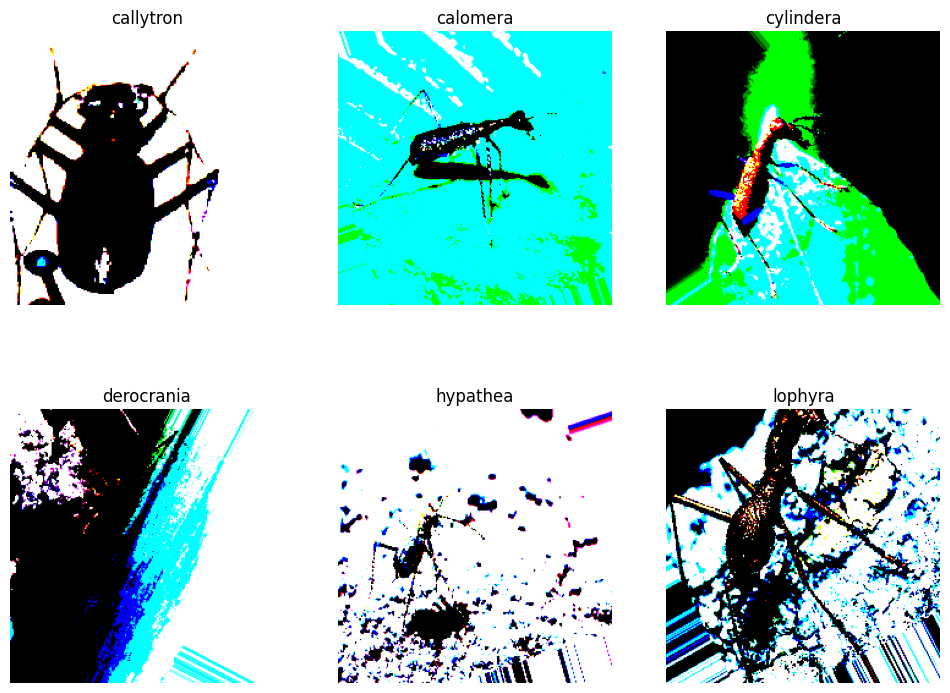

In [ ]:
plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    if k == 6:
        break
    else:
        plt.subplot(2, 3, k+1);
        plt.imshow((img + 1) / 2);
        # plt.imshow(img.astype("uint8"));

        # .numpy().astype("uint8")
        plt.title(cc[k]);
        plt.axis('off');
plt.savefig(path2+"augment2.png",bbox_inches='tight')


In [ ]:
# Function to store predictions in a DataFrame
def save_predictions(dataset, model, output_file='predictions.csv'):

    preds = model.predict(test_generator)
    predicted_classes = tf.argmax(preds, axis=1).numpy()
    true_labels = test_generator.classes
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'True Label': true_labels,
        'Predicted Class': predicted_classes,
        'Predicted Probability': preds.max(1)
    })

    # Save the DataFrame to a CSV file
    results_df.to_csv(output_file, index=False)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 16
STEPS_PER_EPOCH = 160
#STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 32


In [ ]:
CLASSES = train_generator.labels.max()+1

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
# x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# transfer learning
'''
for layer in base_model.layers:
    layer.trainable = False
'''

# for layer in model.layers[:20]:
#     layer.trainable = False
#op=optimizers.RMSprop(lr=0.0001)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
# early_stopping = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=1e-8)
target_accuracy = 0.82
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.01,          # Minimum change to qualify as an improvement
    patience=100,              # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='auto',              # Mode can be 'min', 'max', or 'auto'
    # baseline=target_accuracy, # Stop training when the accuracy reaches this value
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=318,
    validation_data=test_generator,
    validation_steps=111,verbose=1,callbacks=[checkpoint, early_stopping,reduce_lr])


Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 108s 161ms/step - accuracy: 0.0915 - loss: 51423.3945 - val_accuracy: 0.1171 - val_loss: 2.1964 - learning_rate: 0.0010
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - accuracy: 0.0909 - loss: 2.4849 - val_accuracy: 0.1081 - val_loss: 2.1956 - learning_rate: 0.0010
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.1135 - loss: 2.1960 - val_accuracy: 0.0811 - val_loss: 2.1958 - learning_rate: 0.0010
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.1322 - loss: 2.1964 - val_accuracy: 0.0631 - val_loss: 2.1964 - learning_rate: 0.0010
Epoch 5/50


KeyboardInterrupt: 

In [ ]:
model_name = "VGG16-128"

In [ ]:
val_loss, val_accuracy = model.evaluate(test_generator)
save_predictions(test_generator, model, output_file=f'{path2}/{model_name}_train_predictions.csv')

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - accuracy: 0.6154 - loss: 1.7089
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    # rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/datagen',  # Replace with your training data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for SVC
)

Found 1428 images belonging to 9 classes.


In [ ]:
# Extract features using VGG16
features = base_model.predict(train_generator, steps=len(train_generator), verbose=1)

# Flatten the features
features_flattened = features.reshape(features.shape[0], -1)

# Get the labels
labels = train_generator.classes

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step


In [ ]:
features.shape

(1428, 7, 7, 512)

In [ ]:
# Create an SVC model
svc_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the SVC model
svc_model.fit(features_flattened, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
train_generatort = train_datagen.flow_from_directory(
    '/content/Tiger-beetle-image-dataset-main/Testing_data',  # Replace with your training data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for SVC
)

Found 111 images belonging to 9 classes.


In [ ]:
# Extract features using VGG16
featurest = base_model.predict(train_generatort, steps=len(train_generatort), verbose=1)

# Flatten the features
features_flattenedt = featurest.reshape(featurest.shape[0], -1)

# Get the labels
labelst = train_generatort.classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step


In [ ]:
predi = svc_model.predict(features_flattenedt)

In [ ]:
(labelst == predi).sum() / predi.shape

array([0.48648649])

In [11]:
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [12]:
import numpy as np
from keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [13]:
def load_model(model_name):
    if model_name == 'vgg16':
        return VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'resnet50':
        return ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'inceptionv3':
        return InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'mobilenet':
        return MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError("Model not recognized. Choose from 'vgg16', 'resnet50', 'inceptionv3', 'mobilenet'.")


In [19]:
# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/datagen',  # Replace with your training data path
    target_size=(224, 224),  # Adjust based on the model used
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for SVC
)


Found 1428 images belonging to 9 classes.


In [20]:
# Load the desired model
model_name = 'vgg16'  # Change to 'resnet50', 'inceptionv3', or 'mobilenet' as needed
base_model = load_model(model_name)

# Freeze the layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Extract features using the selected model
features = base_model.predict(train_generator, steps=len(train_generator), verbose=1)

# Flatten the features
features_flattened = features.reshape(features.shape[0], -1)

# Get the labels
labels = train_generator.classes


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 849s 19s/step


In [26]:
np.save(path+"labels.npy",labels)

In [21]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
features_pca = pca.fit_transform(features_flattened)


In [22]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features_pca, labels)


RandomForestClassifier(random_state=42)

In [23]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(features_pca, labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
features_pca.shape

(1428, 838)

In [ ]:
# Train CatBoost model
cat_model = CatBoostClassifier(iterations=1000, verbose=0)
cat_model.fit(features_pca, labels)


KeyboardInterrupt: 

In [35]:
# Create an instance of ImageDataGenerator for new data
new_datagen = ImageDataGenerator(rescale=1./255)

# Load new images from directory
new_data_generator = new_datagen.flow_from_directory(
    '/content/Tiger-beetle-image-dataset-main/Testing_data',  # Replace with your new data path
    target_size=(224, 224),  # Adjust based on the model used
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for SVC
)

# Extract


Found 111 images belonging to 9 classes.


In [36]:
labelst = new_data_generator.classes

In [37]:
# Extract features using the selected model for new data
new_features = base_model.predict(new_data_generator, steps=len(new_data_generator), verbose=1)

# Flatten the features
new_features_flattened = new_features.reshape(new_features.shape[0], -1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 15s/step


In [43]:
# Apply PCA to new features
new_features_pca = pca.transform(new_features_flattened)


In [44]:
# Make predictions using the trained Random Forest model
rf_predictions = rf_model.predict(new_features_pca)


In [45]:
(labelst == rf_predictions).sum() / labelst.shape

array([0.28828829])

In [46]:
# Make predictions using the trained XGBoost model
xgb_predictions = xgb_model.predict(new_features_pca)


In [47]:
(labelst == xgb_predictions).sum() / labelst.shape

array([0.30630631])

In [ ]:
# Make predictions using the trained CatBoost model
cat_predictions = cat_model.predict(new_features_pca)


In [ ]:
(labelst == cat_predictions).sum() / labelst.shape

In [18]:
# augmentation

# Step 1: Set up the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# /content/Tiger-beetle-image-dataset-main/augtest
# Step 2: Define the paths
source_directory = '/content/Tiger-beetle-image-dataset-main/Testing_data'  # Path to the original dataset
target_directory = '/content/datagent'        # Path to save augmented images
                                   # Desired number of images per class

# Step 3: Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)
desired_countall =50
# Step 4: Loop through each class and generate augmented images
for class_name in os.listdir(source_directory):
    class_path = os.path.join(source_directory, class_name)

    if os.path.isdir(class_path):
        # Create a directory for the augmented images of this class
        augmented_class_path = os.path.join(target_directory, class_name)
        if not os.path.exists(augmented_class_path):
            os.makedirs(augmented_class_path)

        # Load all images in the class directory
        images = [img for img in os.listdir(class_path) if img.endswith(('png', 'jpg', 'jpeg'))]

        # Initialize a counter for the number of augmented images created
        augmented_count = 0
        desired_count = desired_countall - len(images) + 1
        u = desired_count//len(images)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(228, 228))  # Load and resize the image
            img_array = img_to_array(img)                     # Convert to array
            img_array = np.expand_dims(img_array, axis=0)    # Expand dimensions to match the generator input

            # Generate augmented images
            ppo = 0
            for batch in datagen.flow(img_array, batch_size=1):
                # Save the augmented images
                save_img(os.path.join(augmented_class_path, f'aug_{augmented_count}.jpg'), batch[0])
                augmented_count += 1
                ppo += 1
                # Stop if we have reached the desired count
                if ppo >= u:
                    break

        print(f"Generated {augmented_count} augmented images for class '{class_name}'.")

print("Augmentation complete.")


Generated 42 augmented images for class 'lophyra'.
Generated 36 augmented images for class 'callytron'.
Generated 33 augmented images for class 'myriochela'.
Generated 36 augmented images for class 'cylindera'.
Generated 48 augmented images for class 'calomera'.
Generated 42 augmented images for class 'hypathea'.
Generated 28 augmented images for class 'tricondyla'.
Generated 33 augmented images for class 'neocollyris'.
Generated 44 augmented images for class 'derocrania'.
Augmentation complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the dataset from the directory
dataset_path = "/content/datagen"
batch_size = 32
img_height = 224  # Adjust the height as needed
img_width = 224   # Adjust the width as needed

# Load training dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # 'int' for integer labels or 'categorical' for one-hot encoding
    shuffle=True,      # Shuffle the dataset
    seed=123,          # Set a seed for reproducibility
    validation_split=0.2,  # Use 20% of the data for validation
    subset='training'  # 'training' subset
)

# Load validation dataset
validation_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # Same as above
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Same as above
    subset='validation'  # 'validation' subset
)


Found 1428 files belonging to 9 classes.
Using 1143 files for training.
Found 1428 files belonging to 9 classes.
Using 285 files for validation.


In [ ]:
# 285/9

In [ ]:
c = []
for i,j in validation_dataset:
  for k in j.numpy():
    c.append(k)
  # break
c

[2,
 8,
 7,
 6,
 8,
 1,
 3,
 3,
 6,
 3,
 6,
 4,
 3,
 6,
 6,
 4,
 0,
 1,
 3,
 5,
 7,
 2,
 5,
 2,
 1,
 8,
 2,
 5,
 7,
 1,
 7,
 5,
 2,
 3,
 3,
 3,
 0,
 5,
 0,
 4,
 5,
 0,
 2,
 5,
 8,
 0,
 3,
 5,
 5,
 2,
 4,
 6,
 3,
 7,
 7,
 8,
 2,
 1,
 5,
 2,
 6,
 5,
 4,
 2,
 1,
 8,
 3,
 6,
 8,
 2,
 5,
 2,
 5,
 2,
 1,
 3,
 0,
 4,
 2,
 5,
 5,
 1,
 3,
 2,
 7,
 8,
 5,
 3,
 3,
 3,
 8,
 4,
 2,
 7,
 1,
 3,
 7,
 2,
 5,
 3,
 6,
 4,
 3,
 7,
 8,
 6,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 4,
 2,
 7,
 7,
 1,
 3,
 5,
 3,
 2,
 0,
 0,
 3,
 6,
 1,
 5,
 8,
 4,
 7,
 4,
 6,
 4,
 2,
 3,
 0,
 7,
 2,
 7,
 3,
 1,
 2,
 6,
 8,
 0,
 4,
 0,
 6,
 0,
 2,
 6,
 7,
 7,
 4,
 0,
 7,
 0,
 5,
 8,
 3,
 3,
 3,
 2,
 7,
 1,
 8,
 8,
 0,
 2,
 0,
 8,
 8,
 6,
 0,
 2,
 2,
 7,
 8,
 6,
 4,
 8,
 2,
 4,
 8,
 4,
 7,
 7,
 0,
 0,
 7,
 7,
 3,
 4,
 7,
 3,
 2,
 5,
 8,
 6,
 8,
 1,
 1,
 2,
 0,
 0,
 3,
 3,
 5,
 2,
 0,
 3,
 3,
 7,
 6,
 4,
 0,
 0,
 6,
 3,
 7,
 5,
 6,
 6,
 0,
 7,
 8,
 0,
 4,
 1,
 6,
 8,
 0,
 8,
 2,
 8,
 0,
 0,
 3,
 8,
 2,
 3,
 5,
 1,
 6,
 3,
 3,
 1,
 5,
 3,


In [ ]:
import os

In [ ]:
k = {i:j for i,j in enumerate(validation_dataset.class_names)}

In [ ]:
t = pd.DataFrame(c,columns=['classes'])

In [ ]:
t['classes'].map(k).to_csv("/content/drive/MyDrive/work 1 image/test_classes.csv",index=False)

In [ ]:
t['classes'].map(k)

,classes
0,cylindera
1,tricondyla
2,neocollyris
3,myriochela
4,tricondyla
...,...
280,derocrania
281,myriochela
282,cylindera
283,lophyra


In [ ]:
j.numpy()

array([2, 7, 7, 7, 6, 5, 4, 8, 3, 2, 0, 3, 7, 0, 4, 6, 1, 4, 8, 6, 6, 6,
       8], dtype=int32)

In [ ]:


# # Replace '/content/eye/' with the path to your dataset directory
# train_dataset_path = "/content/drive/MyDrive/image 1 insect/augmenttrain"
# test_dataset_path = "/content/Tiger-beetle-image-dataset-main/Testing_data"
# batch_size = 32
# img_height = 224 # Adjust the height as needed
# img_width = 224   # Adjust the width as needed

# # Load train dataset
# train_dataset = image_dataset_from_directory(
#     train_dataset_path,
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     label_mode='int',  # 'int' for integer labels or 'categorical' for one-hot encoding
#     shuffle=True,      # Shuffle the dataset
#     seed=123,          # Set a seed for reproducibility
# )

# # Load test dataset
# validation_dataset = image_dataset_from_directory(
#     test_dataset_path,
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     label_mode='int',  # Same as above
#     shuffle=False,     # Don't shuffle the test dataset
#     seed=123,
# )


In [ ]:
x_batch, y_batch = next(train_generator)

# for x_batch, y_batch in train_generator:
    # break

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1);
    plt.imshow((img + 1) / 2);
    plt.axis('off');
plt.savefig("/content/drive/MyDrive/work 1 image/augment3.png",bbox_inches='tight')


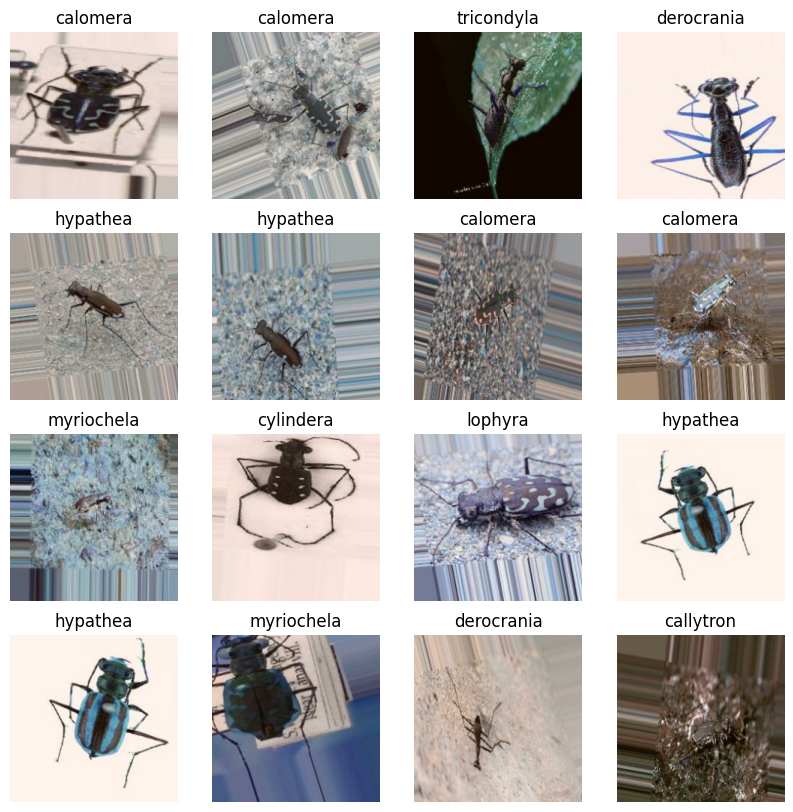

In [ ]:
# Get one batch of images and labels
for images, labels in train_dataset.take(1):  # Take one batch
    break  # Exit the loop after getting the first batch

# Step 3: Plot the images with their labels
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    num_images = min(len(images), 16)  # Limit to 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)  # Create a 4x4 grid
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to numpy array
        plt.title(class_names[labels[i]])  # Set the title to the class name
        plt.axis("off")  # Turn off axis
    plt.show()

# Get class names from the dataset
class_names = train_dataset.class_names

# Plot the images
plot_images(images, labels, class_names)

In [ ]:
train_generator.labels.max()+1

9

In [ ]:
test_generator,train_generator

In [ ]:
class_names = train_generator.labels.max()+1

In [ ]:
class_names = len(train_dataset.class_names)

In [ ]:
hw = 224
wh = 224

In [ ]:

# Define a simple dense model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(hw, wh, 3)),  # Flatten the 64x64x3 images
    tf.keras.layers.Dense(128, activation='relu'),     # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),      # Another fully connected layer
    tf.keras.layers.Dense(class_names, activation='softmax')     # Output layer with 7 classes (softmax for classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='spars_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' as labels are integers
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,276,553 (73.53 MB)

 Trainable params: 19,276,553 (73.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# List of pre-trained models
models_to_test = [ResNet50, VGG16, EfficientNetB0, EfficientNetB7, DenseNet121, MobileNetV2, InceptionV3, Xception, DenseNet169, DenseNet201, NASNetLarge, NASNetMobile]
model_names = ["ResNet50", "VGG16", "EfficientNetB0", "EfficientNetB7", "DenseNet121", "MobileNetV2", "InceptionV3", "Xception", "DenseNet169", "DenseNet201", "NASNetLarge", "NASNetMobile"]

In [ ]:
res = "/content/drive/MyDrive/work 1 image/"

In [ ]:
# Function to store predictions in a DataFrame
def save_predictions(dataset, model, label_col='label', output_file='predictions.csv'):
    true_labels = []
    predictions = []
    probabilities = []

    # Iterate through the dataset to collect true labels and predictions
    for images, labels in dataset:
        preds = model.predict(images,verbose=0)  # Get predictions
        predicted_classes = tf.argmax(preds, axis=1)  # Get the class with the highest probability

        true_labels.extend(labels.numpy())  # Append true labels
        predictions.extend(predicted_classes.numpy())  # Append predicted classes
        probabilities.extend(preds)  # Append predicted probabilities

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'True Label': true_labels,
        'Predicted Class': predictions,
        'Predicted Probability': probabilities
    })

    # Save the DataFrame to a CSV file
    results_df.to_csv(output_file, index=False)

In [ ]:

def plot_history(history, model_name):
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"{res}/{model_name}_acc_.png",dpi=300)
    pd.DataFrame.from_dict(history.history).to_csv(f"{res}/{model_name}.csv",index=False)
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"{res}/{model_name}_loss_.png",dpi=300)
    plt.show()



In [ ]:
class_names

9

In [ ]:
def create_fine_tuned_model(base_model_class, input_shape=(hw, wh, 3), num_classes=7):
    # Load the pre-trained model without the top classification layers
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model (optional: you can unfreeze later for fine-tuning)
    # base_model.trainable = True
    print(len(base_model.layers))
    for layer in base_model.layers[:-4]:  # Freeze all but the last 10 layers
        layer.trainable = False
    # Create a new model on top
    model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pool the features from the base model
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dropout(0.5),               # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dropout(0.5),               # Another Dropout layer
    layers.Dense(class_names, activation='softmax')  # Final classification
    ])

    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='min')
# early_stopping = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.8, patience=5, min_lr=1e-8)
target_accuracy = 0.82
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0.01,          # Minimum change to qualify as an improvement
    patience=100,              # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='auto',              # Mode can be 'min', 'max', or 'auto'
    baseline=target_accuracy, # Stop training when the accuracy reaches this value
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
,verbose=1,callbacks=[checkpoint, early_stopping,reduce_lr]

In [ ]:
class_names

9

In [ ]:
model_class, model_name = models_to_test[1], model_names[1]
print(f"\nTraining and evaluating {model_name} with fine-tuning...")

# Create the model
model = create_fine_tuned_model(model_class, input_shape=(hw, wh, 3), num_classes=class_names)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=8e-5,weight_decay=0.05),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.summary()




Training and evaluating VGG16 with fine-tuning...
19


In [ ]:
# test_generator,train_generator

In [ ]:
# train_dataset = train_generator
# validation_dataset = test_generator

In [ ]:
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='min')
# early_stopping = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.8, patience=5, min_lr=1e-8)
target_accuracy = 0.82
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0.01,          # Minimum change to qualify as an improvement
    patience=100,              # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='auto',              # Mode can be 'min', 'max', or 'auto'
    baseline=target_accuracy, # Stop training when the accuracy reaches this value
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)
# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10,verbose=1,callbacks=[checkpoint, early_stopping,reduce_lr])
save_predictions(train_dataset, model, output_file=f'{res}/{model_name}_train_predictions.csv')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_dataset)
save_predictions(validation_dataset, model, output_file=f'{res}/{model_name}_val_predictions.csv')

# Example usa
print(f"\n{model_name} Validation Loss: {val_loss}")
print(f"{model_name} Validation Accuracy: {val_accuracy}")
# Example usage (after training each model):
# plot_history(history, model_name)



Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.5425 - loss: 2.0918 - val_accuracy: 0.7298 - val_loss: 1.8646 - learning_rate: 8.0000e-05
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.5039 - loss: 2.1372 - val_accuracy: 0.7544 - val_loss: 1.7043 - learning_rate: 8.0000e-05
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.5503 - loss: 2.0188 - val_accuracy: 0.7860 - val_loss: 1.6316 - learning_rate: 8.0000e-05
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.5618 - loss: 1.9659 - val_accuracy: 0.8140 - val_loss: 1.5646 - learning_rate: 8.0000e-05
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.6078 - loss: 1.8773 - val_accuracy: 0.8211 - val_loss: 1.4987 - learning_rate: 8.0000e-05
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.6608 - loss: 1.7316 - val_accuracy: 0.7719 - val_loss: 1.5260 - learning_rate: 8.0000e-05
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accura

In [ ]:
save_predictions(train_dataset, model, output_file=f'{res}/{model_name}_train_predictions.csv')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_dataset)
save_predictions(validation_dataset, model, output_file=f'{res}/{model_name}_val_predictions.csv')

# Example usa
print(f"\n{model_name} Validation Loss: {val_loss}")
print(f"{model_name} Validation Accuracy: {val_accuracy}")
# Example usage (after training each model):
# plot_history(history, model_name)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8441 - loss: 1.2888

VGG16 Validation Loss: 1.2214229106903076
VGG16 Validation Accuracy: 0.8631578683853149


In [ ]:
# Compile, train, and evaluate each pre-trained model with the added Dense layer
for model_class, model_name in zip(models_to_test[:1], model_names[:1]):
    print(f"\nTraining and evaluating {model_name} with fine-tuning...")

    # Create the model
    model = create_fine_tuned_model(model_class, input_shape=(hw, wh, 3), num_classes=num_classes)
    # Optionally, freeze some layers
    for layer in model.layers[:10]:  # Freeze all but the last 10 layers
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=8e-5,weight_decay=0.05),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # model.summary()


    checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=7)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-8)

    # Train the model
    history = model.fit(train_dataset, validation_data=validation_dataset, epochs=50,verbose=1,callbacks=[checkpoint, early_stopping,reduce_lr])
    save_predictions(train_dataset, model, output_file=f'{res}/{model_name}_train_predictions.csv')

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(validation_dataset)
    save_predictions(validation_dataset, model, output_file=f'{res}/{model_name}_val_predictions.csv')

    # Example usa
    print(f"\n{model_name} Validation Loss: {val_loss}")
    print(f"{model_name} Validation Accuracy: {val_accuracy}")
    # Example usage (after training each model):
    # plot_history(history, model_name)




Training and evaluating ResNet50 with fine-tuning...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.0992 - loss: 3.2952

KeyboardInterrupt: 

In [ ]:
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=4, min_lr=1e-8)
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=100,verbose=1,callbacks=[checkpoint, early_stopping,reduce_lr])
save_predictions(train_dataset, model, output_file=f'{res}/{model_name}_train_predictions.csv')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_dataset)
save_predictions(validation_dataset, model, output_file=f'{res}/{model_name}_val_predictions.csv')

# Example usa
print(f"\n{model_name} Validation Loss: {val_loss}")
print(f"{model_name} Validation Accuracy: {val_accuracy}")
# Example usage (after training each model):
# plot_history(history, model_name)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.7811 - loss: 1.4369 - val_accuracy: 0.4595 - val_loss: 2.3080 - learning_rate: 2.0000e-05
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.7277 - loss: 1.5086 - val_accuracy: 0.4595 - val_loss: 2.3024 - learning_rate: 2.0000e-05
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.7212 - loss: 1.4646 - val_accuracy: 0.4775 - val_loss: 2.2971 - learning_rate: 2.0000e-05
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7231 - loss: 1.5172 - val_accuracy: 0.4685 - val_loss: 2.2974 - learning_rate: 2.0000e-05
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.7132 - loss: 1.4794 - val_accuracy: 0.4685 - val_loss: 2.2966 - learning_rate: 2.0000e-05
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.7412 - loss: 1.4420 - val_accuracy: 0.4414 - val_loss: 2.2999 - learning_rate: 2.0000e-05
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - acc

In [ ]:
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-6,weight_decay=0.05),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # model.summary()

    # Train the model
    history = model.fit(train_dataset, validation_data=validation_dataset, epochs=100,verbose=1)
    save_predictions(train_dataset, model, output_file=f'{res}/{model_name}_train_predictions.csv')

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(validation_dataset)
    save_predictions(validation_dataset, model, output_file=f'{res}/{model_name}_val_predictions.csv')

    # Example usa
    print(f"\n{model_name} Validation Loss: {val_loss}")
    print(f"{model_name} Validation Accuracy: {val_accuracy}")

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9852 - loss: 1.1812 - val_accuracy: 0.5333 - val_loss: 3.7721
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.9809 - loss: 1.1869 - val_accuracy: 0.5361 - val_loss: 3.8096
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.9871 - loss: 1.1612 - val_accuracy: 0.5417 - val_loss: 3.8430
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - accuracy: 0.9820 - loss: 1.1759 - val_accuracy: 0.5444 - val_loss: 3.9015
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9921 - loss: 1.1678 - val_accuracy: 0.5500 - val_loss: 3.9052
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9884 - loss: 1.1665 - val_accuracy: 0.5500 - val_loss: 3.9148
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.9800 - loss: 1.1674 - val_accuracy: 0.5500 - val_loss: 3.9337
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - accuracy: 0.9930 - loss: 1.1534 - val_

KeyboardInterrupt: 

In [ ]:

def create_simple_cnn(input_shape, num_classes):
    model = models.Sequential()

    # Input Layer
    model.add(layers.Input(shape=input_shape))

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

    return model


cnn_model = create_simple_cnn(input_shape=(hw, wh, 3), num_classes=num_classes)





In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(weight_decay=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Summary of the model
cnn_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,393 (1.62 MB)

 Trainable params: 423,433 (1.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
#
# Train the model
history = model.fit(train_dataset,
                    # validation_split=0.2
                    validation_data=validation_dataset
                    , epochs=100)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.1746 - loss: 2.2221 - val_accuracy: 0.2892 - val_loss: 2.0971
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2251 - loss: 2.1604 - val_accuracy: 0.1759 - val_loss: 2.0821
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.2268 - loss: 2.1258 - val_accuracy: 0.2916 - val_loss: 2.0857
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1889 - loss: 2.1555 - val_accuracy: 0.2867 - val_loss: 2.1116
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2227 - loss: 2.1388 - val_accuracy: 0.2916 - val_loss: 2.1067
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1882 - loss: 2.1485 - val_accuracy: 0.2096 - val_loss: 2.0906
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2121 - loss: 2.1466 - val_accuracy: 0.2024 - val_loss: 2.1047
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1864 - loss: 2.1721 - val_accuracy: 0.

KeyboardInterrupt: 

In [ ]:

# Step 1: Set up the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,      # Randomly translate images horizontally
    height_shift_range=0.2,     # Randomly translate images vertically
    shear_range=0.2,            # Shear angle in counter-clockwise direction
    zoom_range=0.2,             # Randomly zoom into images
    horizontal_flip=True,       # Randomly flip images
    fill_mode='nearest'         # Fill pixels that are newly created
)

# Step 2: Load your dataset
# Assuming you have a directory structure like:
# dataset/
# ├── class1/
# │   ├── img1.jpg
# │   ├── img2.jpg
# ├── class2/
# │   ├── img1.jpg
# │   ├── img2.jpg
# ...
# You can use flow_from_directory to load images directly from the directory

train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Set up the training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/Tiger-beetle-image-dataset-main/Training_data',  # Path to the training data
    target_size=(164, 164),     # Resize images to this size
    batch_size=32,            # Number of images to yield per batch
    class_mode='categorical'  # For multi-class classification
)

# Step 3: Define your CNN model
def create_simple_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Example usage
input_shape = (64, 64, 3)  # Example input shape (height, width, channels)
num_classes = len(train_generator.class_indices)  # Number of classes based on the dataset
cnn_model = create_simple_cnn(input_shape, num_classes)

# Step 4: Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Step 5: Train the model using the augmented data
cnn_model.fit(train_generator,
               steps_per_epoch=train_generator.samples // train_generator.batch_size,
               epochs=10)

# Optionally, you can save the model
cnn_model.save('my_model.h5')


Found 318 images belonging to 9 classes.
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.0950 - loss: 2.1998
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1000 - loss: 2.2071
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.1108 - loss: 2.2001
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.1920 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.0968 - loss: 2.1966
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1875 - loss: 2.1779 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.1550 - loss: 2.1705
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0938 - loss: 2.1949 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.1540 - loss: 2.1605
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2188 - loss: 2.1594 


Generated 52 augmented images for class 'calomera'.
Generated 58 augmented images for class 'callytron'.
Generated 60 augmented images for class 'myriochela'.
Generated 60 augmented images for class 'neocollyris'.
Generated 63 augmented images for class 'tricondyla'.
Generated 56 augmented images for class 'hypathea'.
Generated 58 augmented images for class 'cylindera'.
Generated 53 augmented images for class 'derocrania'.
Generated 55 augmented images for class 'lophyra'.
Augmentation complete.


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[1, 1.5],
    horizontal_flip=True,
    fill_mode='nearest',
    # seed=42
)

Found 318 images belonging to 9 classes.
Found 111 images belonging to 9 classes.


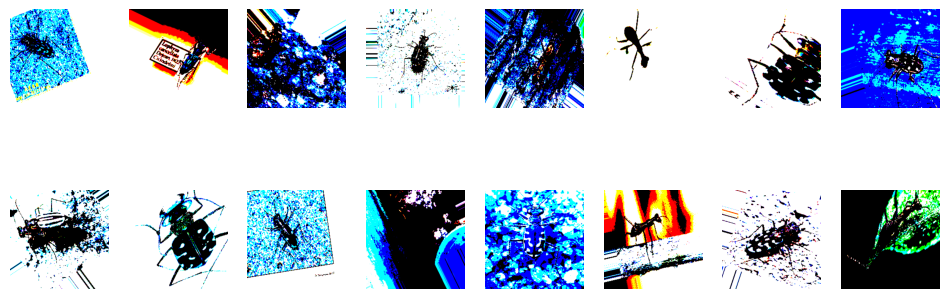

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
#from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, save_img
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers



TRAIN_DIR = '/content/Tiger-beetle-image-dataset-main/Training_data'
TEST_DIR = '/content/Tiger-beetle-image-dataset-main/Testing_data'

CLASSES = 9

# setup model
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.5)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# transfer learning
'''
for layer in base_model.layers:
    layer.trainable = False
'''

for layer in model.layers[:20]:
    layer.trainable = False
#op=optimizers.RMSprop(lr=0.0001)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 16

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')



EPOCHS = 100
BATCH_SIZE = 16
STEPS_PER_EPOCH = 160
#STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 32

MODEL_FILE = 'vgg16_wei.keras'
top_model_weights_path = 'vgg16_wei.keras'

# Set callback functions to early stop training and save the best model so far



checkpoint = ModelCheckpoint(filepath=top_model_weights_path,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')

# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     steps_per_epoch=STEPS_PER_EPOCH,
#     validation_data=validation_generator,
#     validation_steps=VALIDATION_STEPS,callbacks=[checkpoint])

# model.save(MODEL_FILE)


# def plot_training(history):
#   acc = history.history['acc']
#   val_acc = history.history['val_acc']
#   loss = history.history['loss']
#   val_loss = history.history['val_loss']
#   epochs = range(len(acc))
#   plt.figure(1)

#   plt.subplot(211)
#   plt.title('Training and validation accuracy')
#   plt.plot(epochs, acc, 'r.')
#   plt.plot(epochs, val_acc, 'r')


#  # plt.figure()
#   plt.subplot(212)
#   plt.plot(epochs, loss, 'r.')
#   plt.plot(epochs, val_loss, 'r-')
#   plt.title('Training and validation loss')
#   plt.show()

# plot_training(history)







In [ ]:
model.layers[20:]

[<Dropout name=dropout_26, built=True>, <Dense name=dense_65, built=True>]